# Assignment 6

## The Benchmark Experiment
Tested neural network structures should be explored within a benchmark experiment, a factorial design with at least two levels on each of two experimental factors (at least a 2x2 completely crossed design).  You will build your models on train.csv and submit your forecasts for test.csv to Kaggle.com, providing your name and user ID for each experimental trial..

An example experiment could include two values for the number of nodes per inner layer and two values for the number of inner layers. Various machine learning hyperparameter settings may be used.

In summary, this assignment asks you to fit a number of neural networks, comparing processing time and performance across experimental treatments. Processing time will be recorded for the fitting on the train.csv.  Kaggle.com accuracy scores will be reported for all benchmarks.  

## Management Question
Suppose you are a financial institution evaluating machine learning technologies for optical character recognition. Initial testing is on the MNIST digits. What can you conclude from your benchmark study? Which neural network typology and hyperparameter settings would you recommend as being the most trustworthy?

## Programming Resources
Géron, A. (2017). Hands-on machine learning with Scikit-Learn & TensorFlow: Concepts, tools, and techniques to build intelligent systems. Sebastopol, CA: O’Reilly. [ISBN-13 978-1-491-96229-9]. Chapter 11: Training Deep Neural Networks (pp. 275–312). Chapter 11 code (a Jupyter Notebook file 11_deep_learning.ipynb) shows how to use TensorFlow with the MNIST data set:

In [1]:
import tensorflow as tf

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import tflearn
from subprocess import check_output
from keras.utils.np_utils import to_categorical
from sklearn.cross_validation import train_test_split

C:\Users\hiefu\Anaconda3\lib\site-packages\dask\dataframe\utils.py:13: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


curses is not supported on this machine (please install/reinstall curses for an optimal experience)
Instructions for updating:
Colocations handled automatically by placer.


Using TensorFlow backend.
C:\Users\hiefu\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
# import libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split
%matplotlib inline
from datetime import datetime # Get current time

C:\Users\hiefu\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [4]:
# Import data
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [5]:
# check on the training data information
print(train.shape)

(42000, 785)


The tasin dataset contains 42,000 rows and 785 columns.

In [6]:
# Check the first five row of training dataset
train.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


From the above information, we can see there are 784 pixel columns for pixel and label is  the number which represents.

In [7]:
# Check how many unique number in the label column
val=train['label'].unique()
print(sorted(val))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


We can see there is 10 different numbers, 0 to 8, on the lable column.

In [8]:
# Check is any missing data in training dataset
train.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

From the above information, we can see there is no missing values in the training dataset.

In [9]:
# Sort out our taining set
x=train.drop(['label'], axis=1)
y=train['label']
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=1)

# 1. TensorFlow 

## Number of Hidden Layers

Lower hidden layers model low-level structures, such as line segments of various shares and orientations. Intermediate hiffen layers combine these low-level structures to model intermediate-level structures, such as squares and circles. The highest hidden layeers and the output layer combine these intermediate structures to model high-level structure, such as face.  

In this case, the lower hidden layers would be enough for mdoeling. 

## Number of Neurons per Hidden Layer

So how many neurons should we use per hidden layer? "The optimal size of the hidden layer is usually between the size of the input and size of the output layers" - Jeff Heaton, author of Introduction to Neural Networks in Java offers a few more. 

We know the size of input neuros is 28x28 = 784 and the output neuros is 10, since there are 10 different numbers. So, the neuros we should use for each layer should between 10 and 784.   


In [10]:
# Scale the data
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

## Model 1 - 2 Layers with 128 nods

In [11]:
# Model 1 - 2 layers with 128 nods
m_1 = tf.keras.models.Sequential()
m_1.add(tf.keras.layers.Flatten())
m_1.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
m_1.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
m_1.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))
m_1.compile(optimizer='adam', 
           loss='sparse_categorical_crossentropy',
           metrics=['accuracy'])

In [12]:
# Train the Model 1
start=datetime.now()
hist=m_1.fit(x_train.values, y_train.values, validation_data=(x_test.values, y_test.values), epochs=30)
end=datetime.now()
print("Time spend:", end-start)

Train on 33600 samples, validate on 8400 samples
Epoch 1/30
33600/33600 [==============================] - 3s 100us/sample - loss: 0.4179 - acc: 0.8838 - val_loss: 0.2167 - val_acc: 0.9352
Epoch 2/30
33600/33600 [==============================] - 3s 96us/sample - loss: 0.1795 - acc: 0.9454 - val_loss: 0.1566 - val_acc: 0.9556
Epoch 3/30
33600/33600 [==============================] - 3s 97us/sample - loss: 0.1263 - acc: 0.9625 - val_loss: 0.1277 - val_acc: 0.9612
Epoch 4/30
33600/33600 [==============================] - 3s 97us/sample - loss: 0.0971 - acc: 0.9703 - val_loss: 0.1141 - val_acc: 0.9657
Epoch 5/30
33600/33600 [==============================] - 3s 97us/sample - loss: 0.0747 - acc: 0.9769 - val_loss: 0.1172 - val_acc: 0.9657
Epoch 6/30
33600/33600 [==============================] - 3s 97us/sample - loss: 0.0593 - acc: 0.9809 - val_loss: 0.0990 - val_acc: 0.9685
Epoch 7/30
33600/33600 [==============================] - 3s 98us/sample - loss: 0.0469 - acc: 0.9851 - val_loss: 0.

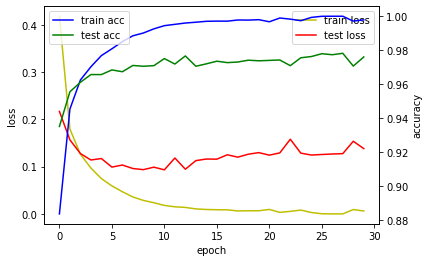

In [13]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='test loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper right')

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='test acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()

## Model 2 - 2 Layers with 64 nods

In [14]:
# Model 1 - 2 layers with 128 nods
m_2 = tf.keras.models.Sequential()
m_2.add(tf.keras.layers.Flatten())
m_2.add(tf.keras.layers.Dense(64, activation=tf.nn.relu))
m_2.add(tf.keras.layers.Dense(64, activation=tf.nn.relu))
m_2.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))
m_2.compile(optimizer='adam', 
           loss='sparse_categorical_crossentropy',
           metrics=['accuracy'])

In [15]:
# Train the Model 1
start=datetime.now()
hist=m_2.fit(x_train.values, y_train.values, validation_data=(x_test.values, y_test.values), epochs=30)
end=datetime.now()
print("Time spend:", end-start)

Train on 33600 samples, validate on 8400 samples
Epoch 1/30
33600/33600 [==============================] - 3s 98us/sample - loss: 0.5083 - acc: 0.8618 - val_loss: 0.2508 - val_acc: 0.9248
Epoch 2/30
33600/33600 [==============================] - 3s 89us/sample - loss: 0.2300 - acc: 0.9315 - val_loss: 0.1977 - val_acc: 0.9390
Epoch 3/30
33600/33600 [==============================] - 3s 89us/sample - loss: 0.1799 - acc: 0.9464 - val_loss: 0.1655 - val_acc: 0.9512
Epoch 4/30
33600/33600 [==============================] - 3s 88us/sample - loss: 0.1475 - acc: 0.9549 - val_loss: 0.1577 - val_acc: 0.9526
Epoch 5/30
33600/33600 [==============================] - 3s 89us/sample - loss: 0.1232 - acc: 0.9619 - val_loss: 0.1299 - val_acc: 0.9607
Epoch 6/30
33600/33600 [==============================] - 3s 88us/sample - loss: 0.1039 - acc: 0.9683 - val_loss: 0.1196 - val_acc: 0.9623
Epoch 7/30
33600/33600 [==============================] - 3s 90us/sample - loss: 0.0896 - acc: 0.9724 - val_loss: 0.1

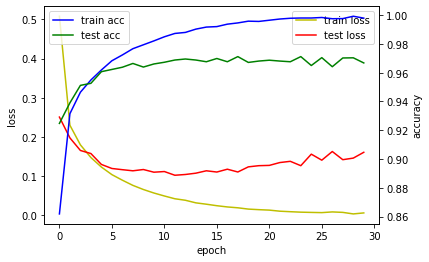

In [16]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='test loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper right')

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='test acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()

## Model 3 - 4 Layers with 128 nods

In [17]:
# Model 3 - 4 layers with 128 nods
m_3 = tf.keras.models.Sequential()
m_3.add(tf.keras.layers.Flatten())
m_3.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
m_3.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
m_3.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
m_3.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
m_3.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))
m_3.compile(optimizer='adam', 
           loss='sparse_categorical_crossentropy',
           metrics=['accuracy'])

In [18]:
# Train the Model 3
start=datetime.now()
hist=m_3.fit(x_train.values, y_train.values, validation_data=(x_test.values, y_test.values), epochs=30)
end=datetime.now()
print("Time spend:", end-start)

Train on 33600 samples, validate on 8400 samples
Epoch 1/30
33600/33600 [==============================] - 4s 129us/sample - loss: 0.3898 - acc: 0.8806 - val_loss: 0.1819 - val_acc: 0.9440
Epoch 2/30
33600/33600 [==============================] - 4s 118us/sample - loss: 0.1475 - acc: 0.9543 - val_loss: 0.1266 - val_acc: 0.9623
Epoch 3/30
33600/33600 [==============================] - 4s 118us/sample - loss: 0.1018 - acc: 0.9674 - val_loss: 0.1152 - val_acc: 0.9638
Epoch 4/30
33600/33600 [==============================] - 4s 118us/sample - loss: 0.0787 - acc: 0.9756 - val_loss: 0.1046 - val_acc: 0.9688
Epoch 5/30
33600/33600 [==============================] - 4s 118us/sample - loss: 0.0644 - acc: 0.9791 - val_loss: 0.1189 - val_acc: 0.9675
Epoch 6/30
33600/33600 [==============================] - 4s 118us/sample - loss: 0.0507 - acc: 0.9838 - val_loss: 0.0935 - val_acc: 0.9725
Epoch 7/30
33600/33600 [==============================] - 4s 118us/sample - loss: 0.0416 - acc: 0.9861 - val_lo

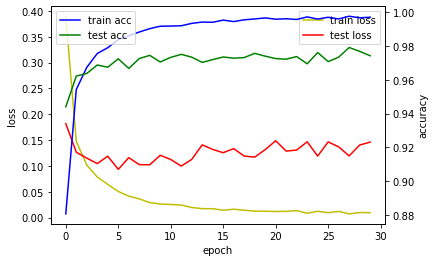

In [19]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='test loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper right')

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='test acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()

## Model 4 - 4 Layers with 64 nods

In [20]:
# Model 4 - 4 layers with 64 nods
m_4 = tf.keras.models.Sequential()
m_4.add(tf.keras.layers.Flatten())
m_4.add(tf.keras.layers.Dense(64, activation=tf.nn.relu))
m_4.add(tf.keras.layers.Dense(64, activation=tf.nn.relu))
m_4.add(tf.keras.layers.Dense(64, activation=tf.nn.relu))
m_4.add(tf.keras.layers.Dense(64, activation=tf.nn.relu))
m_4.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))
m_4.compile(optimizer='adam', 
           loss='sparse_categorical_crossentropy',
           metrics=['accuracy'])

In [21]:
# Train the Model 4
start=datetime.now()
hist=m_4.fit(x_train.values, y_train.values, validation_data=(x_test.values, y_test.values), epochs=30)
end=datetime.now()
print("Time spend:", end-start)

Train on 33600 samples, validate on 8400 samples
Epoch 1/30
33600/33600 [==============================] - 5s 147us/sample - loss: 0.5079 - acc: 0.8412 - val_loss: 0.2488 - val_acc: 0.9240
Epoch 2/30
33600/33600 [==============================] - 4s 113us/sample - loss: 0.2085 - acc: 0.9358 - val_loss: 0.2227 - val_acc: 0.9312
Epoch 3/30
33600/33600 [==============================] - 4s 108us/sample - loss: 0.1540 - acc: 0.9518 - val_loss: 0.1595 - val_acc: 0.9513
Epoch 4/30
33600/33600 [==============================] - 4s 114us/sample - loss: 0.1178 - acc: 0.9632 - val_loss: 0.1482 - val_acc: 0.9520
Epoch 5/30
33600/33600 [==============================] - 4s 111us/sample - loss: 0.0931 - acc: 0.9704 - val_loss: 0.1178 - val_acc: 0.9645
Epoch 6/30
33600/33600 [==============================] - 4s 110us/sample - loss: 0.0773 - acc: 0.9754 - val_loss: 0.1042 - val_acc: 0.9685
Epoch 7/30
33600/33600 [==============================] - 4s 110us/sample - loss: 0.0621 - acc: 0.9804 - val_lo

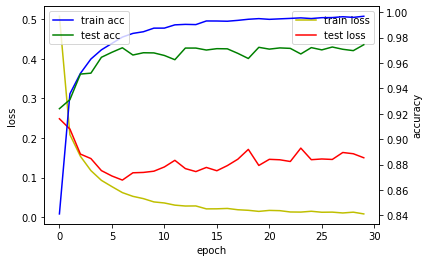

In [22]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='test loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper right')

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='test acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()

# Model Comparision

In [25]:
data=[['Model_1', '2', '128', '0.9979', '0.9761', '0:01:40.504151' ], ['Model_2', '2', '64', '0.9979', '0.9668', '0:01:30.587816'], 
      ['Model_3', '4', '128', '0.9971', '0.9743', '0:02:01.134671'], ['M0del_4', '4', '64', '0.9968', '0.9744', '0:01:55.699393']]
df=pd.DataFrame(data, columns=['Model', 'Layers', 'Nodes per layer', 'Train Accuracy', 'Test Accuracy' ,
                               "Processing Time"])
print(df)                               

     Model Layers Nodes per layer Train Accuracy Test Accuracy Processing Time
0  Model_1      2             128         0.9979        0.9761  0:01:40.504151
1  Model_2      2              64         0.9979        0.9668  0:01:30.587816
2  Model_3      4             128         0.9971        0.9743  0:02:01.134671
3  M0del_4      4              64         0.9968        0.9744  0:01:55.699393


## Conclusion

From the above information, I have some conclusions as below.

* More layers more times: If the model has more layers, it would take more time to train the model.
* More layers more nods doesn't guarantee with good test result. For instance, the model_3 has 4 layers and 128 nods which doesn't have the best accuracy rate comparing with model_1.

Therefore, in order to find the optimize mode, we would need to find the model with the lowest loss function. A popular choice of loss function in TensorFlow programs is cross-entropy, also known as log-loss, which quantifies the difference between two probability distributions (the predictions and the labels). A perfect classification would result in a cross-entropy of 0, with the loss completely minimized.

One of the optimization algorithm to minimize the loss function is Gradient descent optimization. Gradient descent optimization is a common method for finding the (local) minimum of a function by taking iterative steps along the gradient in a negative (descending) direction.


# 2. Submission for Competition

In [27]:
# Make predictions on the test features
predictions = m_1.predict(test)

In [28]:
#submissions

submissions=pd.DataFrame({"ImageId": list(range(1,len(predictions)+1)),
                         "Label": np.argmax(predictions, axis=1)})
submissions.to_csv("MSDS_422_Assignemnt_6.csv", index=False, header=True)

![](Assignment_6_Sub_1.jpg)

![](Assignment_6_Sub_1.jpg)